<a href="https://colab.research.google.com/github/gustavoroque97/Regress-o-Lineariza-o/blob/main/Regress%C3%A3o_com_Lineariza%C3%A7%C3%A3o_EBAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão III - Tarefa

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df.isna().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [4]:
df[~df['tempo_emprego'].isna()]['tempo_emprego'].mean()

7.746164800507006

In [5]:
df[df['tempo_emprego'].isna()]['tempo_emprego']

data_ref
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
2015-01-01   NaN
              ..
2016-03-01   NaN
2016-03-01   NaN
2016-03-01   NaN
2016-03-01   NaN
2016-03-01   NaN
Name: tempo_emprego, Length: 125760, dtype: float64

In [6]:
df[df['tempo_emprego'].isna()] = df[df['tempo_emprego'].isna()].assign(tempo_emprego=df[~df['tempo_emprego'].isna()]['tempo_emprego'].mean())

In [7]:
df.isna().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [8]:
df.index = pd.to_datetime(df.index)

In [9]:
df_test = df.last('3M')
df_test.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61
2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,4.0,13884.35
2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47
2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82
2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03


In [10]:
df.last('3M')

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2016-01-01,12946,F,N,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,2137.61
2016-01-01,8872,F,N,S,2,Servidor público,Superior completo,Casado,Casa,27,9.301370,4.0,13884.35
2016-01-01,16279,F,S,S,3,Assalariado,Médio,Casado,Casa,38,10.967123,5.0,11042.47
2016-01-01,8158,M,S,S,3,Servidor público,Médio,Casado,Casa,35,5.553425,5.0,1333.82
2016-01-01,9356,F,S,N,0,Assalariado,Médio,Viúvo,Casa,63,9.265753,1.0,17633.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,7.746165,2.0,4084.37
2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66


In [11]:
df_train = df.iloc[:60000,]

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [12]:
df.drop('index', axis=1, inplace = True)

In [13]:
df_train.drop('index',axis=1,inplace=True)
df_test.drop('index',axis=1,inplace=True)

<ipython-input-13-cc9c171c61a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('index',axis=1,inplace=True)
<ipython-input-13-cc9c171c61a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop('index',axis=1,inplace=True)


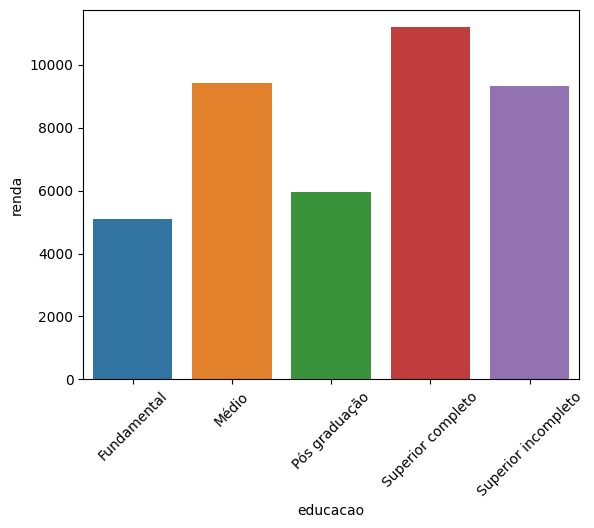

In [14]:
plt.figure()
sns.barplot(data=df_train.groupby('educacao')['renda'].mean().to_frame(), x = 'educacao', y = 'renda', hue = 'educacao')
plt.xticks(rotation=45)
plt.show()

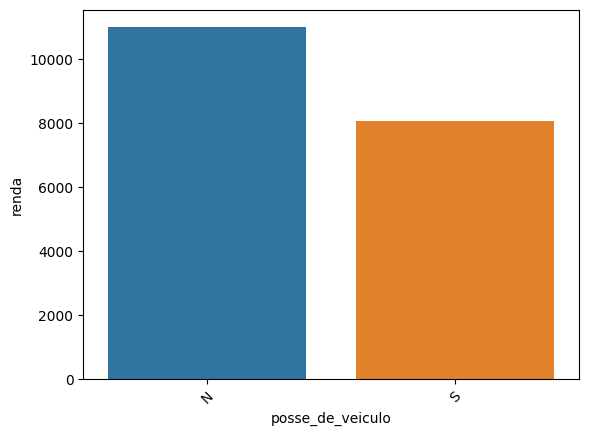

In [15]:
plt.figure()
sns.barplot(data=df_train.groupby('posse_de_veiculo')['renda'].mean().to_frame(), x = 'posse_de_veiculo', y = 'renda', hue = 'posse_de_veiculo')
plt.xticks(rotation=45)
plt.show()

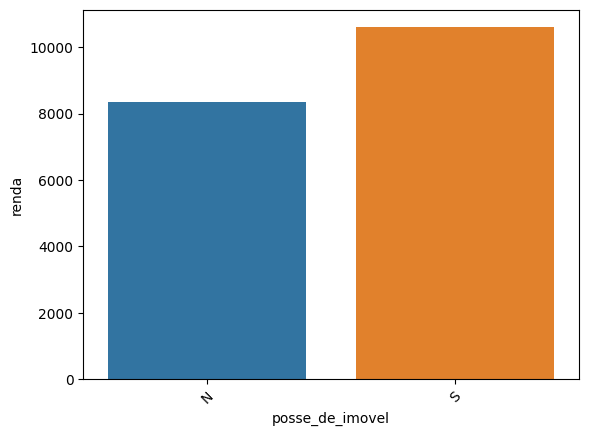

In [16]:
plt.figure()
sns.barplot(data=df_train.groupby('posse_de_imovel')['renda'].mean().to_frame(), x = 'posse_de_imovel', y = 'renda', hue = 'posse_de_imovel')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='tempo_emprego', ylabel='renda'>

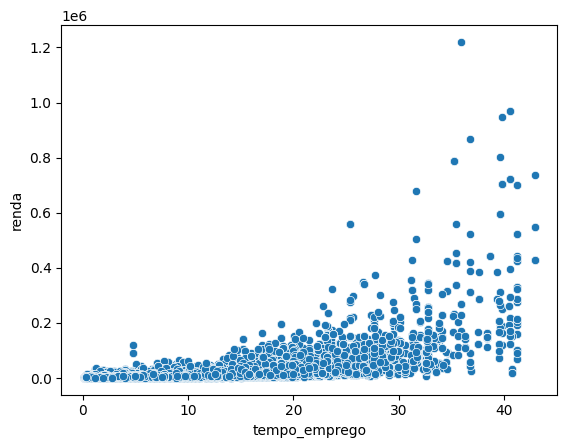

In [17]:
sns.scatterplot(data=df_train, x = 'tempo_emprego', y = 'renda')

<Axes: xlabel='qtd_filhos', ylabel='renda'>

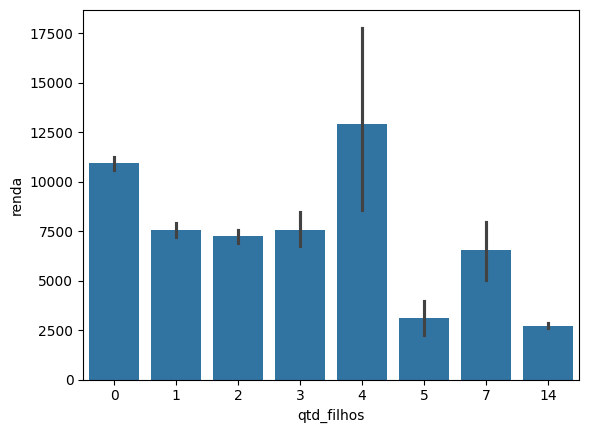

In [18]:
sns.barplot(data=df_train, x = 'qtd_filhos', y = 'renda')

In [19]:
import statsmodels.formula.api as smf

In [90]:
model = smf.ols('renda ~ tempo_emprego',
              data=df_train)
reg1 = model.fit()

In [91]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                 2.966e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:48:35   Log-Likelihood:            -6.9161e+05
No. Observations:               60000   AIC:                         1.383e+06
Df Residuals:                   59998   BIC:                         1.383e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.203e+04    161.802    -74.378      0.000   -1.24e+04   -1.17e+04
tempo_emprego  2810.2882     16.319    172.212      0.000    2778.303    2842.273
==============================================================================
Omnibus:                   114984.594   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        364511652.221
Skew:                          14.842   Prob(JB):                         0.00
Kurtosis:                     383.688   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

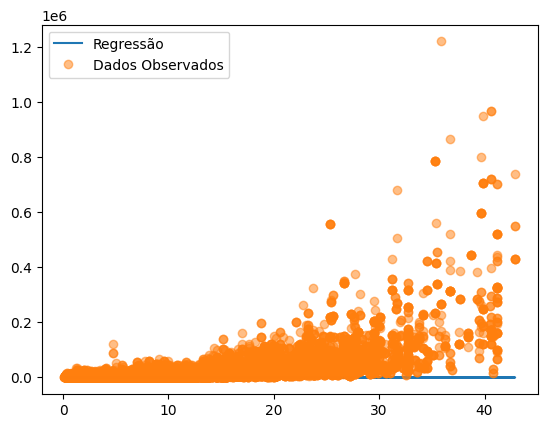

In [120]:
fig, ax = plt.subplots()

ax.plot(df_train.tempo_emprego, reg.fittedvalues, label='Regressão')
ax.plot(df_train.tempo_emprego, df_train.renda, 'o', alpha = 0.5, label = 'Dados Observados')
ax.legend()

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [27]:
df['tempo_emprego_cat'] = pd.qcut(df['tempo_emprego'], 20, duplicates = 'drop')

In [48]:
df['log_renda'] = np.log(df['renda'])
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_cat,log_renda
data_ref,,,,,,,,,,,,,,
2015-01-01,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,"(15.216, 20.216]",9.318131
2015-01-01,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,"(9.093, 10.438]",7.793508
2015-01-01,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,"(8.107, 9.093]",9.528769
2015-01-01,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,"(0.816, 1.458]",7.767196
2015-01-01,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,"(0.816, 1.458]",6.673020


In [45]:
qtd_obs = df.groupby('tempo_emprego_cat')[['tempo_emprego','renda']].count().iloc[:,1].tolist()

In [51]:
media_log_renda = df.groupby('tempo_emprego_cat')['log_renda'].mean().tolist()

In [54]:
media_tempo_emprego = df.groupby('tempo_emprego_cat')['tempo_emprego'].mean().tolist()

In [70]:
df_cat = pd.DataFrame(index = df['tempo_emprego_cat'].unique().sort_values(), columns = ['qtd_obs','media_log_renda','media_tempo_emprego'])
df_cat['qtd_obs'] = qtd_obs
df_cat['media_log_renda'] = media_log_renda
df_cat['media_tempo_emprego'] = media_tempo_emprego

In [71]:
df_cat

,qtd_obs,media_log_renda,media_tempo_emprego
"(0.11699999999999999, 0.816]",37699,8.134693,0.515096
"(0.816, 1.458]",37522,8.215925,1.124770
"(1.458, 2.099]",37437,8.335011,1.783247
"(2.099, 2.912]",37391,8.390223,2.513020
"(2.912, 3.636]",37915,8.522387,3.300942
"(3.636, 4.301]",37253,8.612289,3.989239
"(4.301, 4.934]",37401,8.673718,4.613535
"(4.934, 5.759]",37545,8.809638,5.367816
"(5.759, 6.622]",37495,8.905467,6.205161
"(6.622, 7.471]",37379,8.986450,7.010453


<Axes: xlabel='media_tempo_emprego', ylabel='media_log_renda'>

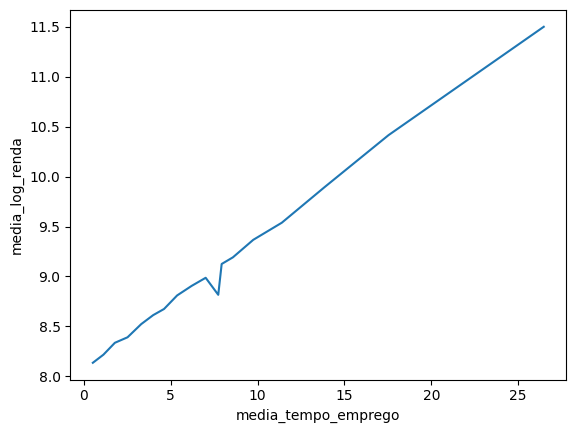

In [72]:
sns.lineplot(data = df_cat, x = 'media_tempo_emprego', y = 'media_log_renda')

Me parece que uma transformação em Y pode ser útil, assim como o Lowess.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


####Transformação em Y

In [123]:
model = smf.ols('I(np.log(renda)) ~ tempo_emprego',
              data=df_train)
reg2 = model.fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       I(np.log(renda))   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                 6.735e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:03:48   Log-Likelihood:                -67887.
No. Observations:               60000   AIC:                         1.358e+05
Df Residuals:                   59998   BIC:                         1.358e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.3538      0.005   1486.574      0.000       7.344       7.363
tempo_emprego     0.1295      0.000    259.526      0.000       0.129       0.130
==============================================================================
Omnibus:                       11.291   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.965
Skew:                          -0.002   Prob(JB):                      0.00252
Kurtosis:                       3.069   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

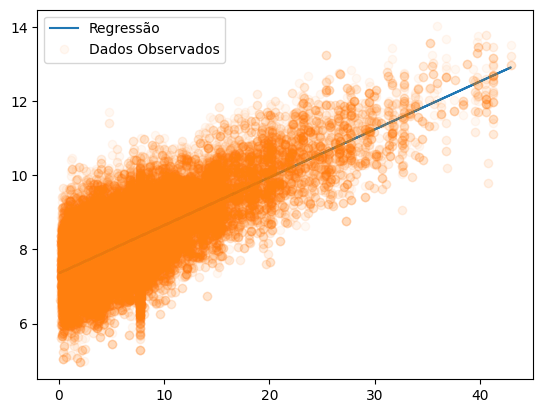

In [124]:
fig, ax = plt.subplots()

ax.plot(df_train.tempo_emprego, reg2.fittedvalues, label='Regressão')
ax.plot(df_train.tempo_emprego, np.log(df_train.renda), 'o', alpha = 0.05, label = 'Dados Observados')
ax.legend()

Como esperado, a transformação em Y produziu uma boa melhora no valor do R-quadrado.

####Lowess

In [93]:
import statsmodels.api as sm
from scipy.interpolate import interp1d

In [107]:
lowess = sm.nonparametric.lowess(df_train.renda, df_train.tempo_emprego)

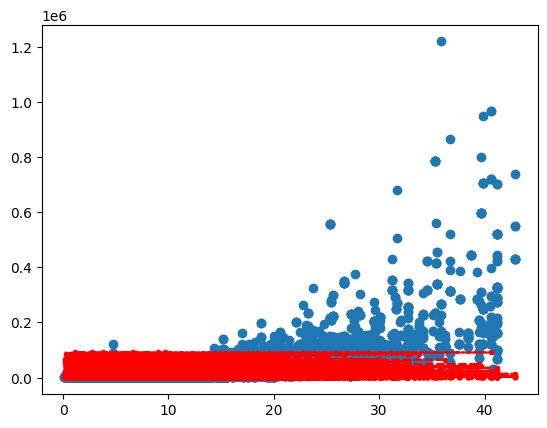

In [108]:
lowess_renda = lowess[:,1]

# Gráfico
fig, ax = plt.subplots()

ax.plot(df_train.tempo_emprego, df_train.renda, 'o', label='Dados observados', alpha=1)
ax.plot(df_train.tempo_emprego, lowess_renda, 'r--.', label='Lowess')

In [111]:
lowess[:,0]

array([ 0.11780822,  0.11780822,  0.11780822, ..., 42.90684932,
       42.90684932, 42.90684932])

In [152]:
# Rodando a interpolação do scipy

f = interp1d(lowess[:,0], lowess_renda, bounds_error = False)
df_train['tempo_emprego_lowess'] = f(df_train.tempo_emprego)
df_test['tempo_emprego_lowess'] = f(df_test.tempo_emprego)

<ipython-input-152-de7f458d75c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['tempo_emprego_lowess'] = f(df_train.tempo_emprego)
<ipython-input-152-de7f458d75c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['tempo_emprego_lowess'] = f(df_test.tempo_emprego)


In [125]:
reg3 = smf.ols('renda ~ tempo_emprego_lowess', data=df_train).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                 5.339e+04
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:04:10   Log-Likelihood:            -6.8456e+05
No. Observations:               60000   AIC:                         1.369e+06
Df Residuals:                   59998   BIC:                         1.369e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4723.1893    109.132    -43.279      0.000   -4937.089   -4509.289
tempo_emprego_lowess     2.0395      0.009    231.073      0.000       2.022       2.057
==============================================================================
Omnibus:                   115883.453   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        470972556.509
Skew:                          14.987   Prob(JB):                         0.00
Kurtosis:                     436.002   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

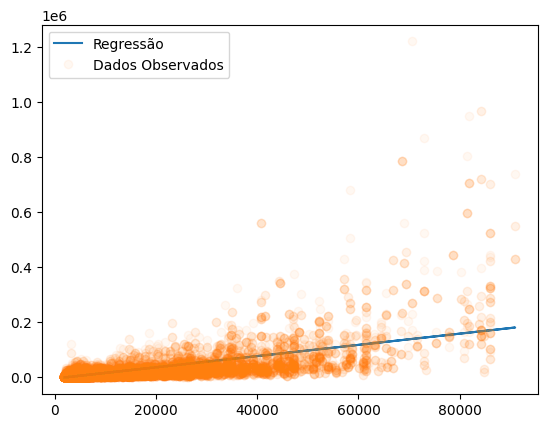

In [126]:
fig, ax = plt.subplots()

ax.plot(df_train.tempo_emprego_lowess, reg3.fittedvalues, label='Regressão')
ax.plot(df_train.tempo_emprego_lowess, df_train.renda, 'o', alpha = 0.05, label = 'Dados Observados')
ax.legend()

Aplicar o Lowess também melhorou os resultados em relação à regressão comum.

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

#### Primeiro modelo:

In [128]:
from sklearn.metrics import r2_score

In [145]:
predictions = reg1.predict(df_test)
print(f'O R-quadrado avaliado na base de teste é: {r2_score(df_test.renda,predictions):.3f}')

O R-quadrado avaliado na base de teste é: 0.272


####Segundo modelo:

In [155]:
predictions = np.exp(reg2.predict(df_test)) # precisamos fazer a transformação inversa: de logaritmo para exponencial
print(f'O R-quadrado avaliado na base de teste é: {r2_score(df_test.renda,predictions):.3f}')

O R-quadrado avaliado na base de teste é: 0.507


####Terceiro modelo:

In [153]:
predictions = reg3.predict(df_test)
print(f'O R-quadrado avaliado na base de teste é: {r2_score(df_test.renda,predictions):.3f}')

O R-quadrado avaliado na base de teste é: 0.394
